CUSTOMER CHURN PREDICTION

BUSINESS UNDERSTANDING

BUSINESS OVERVIEW

BUSINESS PROBLEM

BUSINESS OBJECTIVES

Main Objective

To build a machine learning model that accurately predicts whether a customer is likely to churn.

Specific Objectives

 - To analyze the impact of customer demographics  on churn.

 - To examine the effect of account details  on churn.

 - To assess how subscription plans influence churn.

 - To explore how customer service call frequency relates to churn.

 - To Develop a predictive model to identify customers at risk of churning based on these factors.

 Key Questions

1. How do customer demographics  affect churn?

2. How do account details  influence churn?

3. How do subscription plans impact churn?

4. How does the frequency of customer service calls relate to churn?

5. Can a predictive model accurately identify customers at risk of churning based on these factors?



DATA UNDERSTANDING

The dataset is obtained from Kaggle, specifically from the dataset [Churn in Telecom's dataset](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset).

The dataset has 3333 records and 21 columns including numeric, categorical, and boolean variables.The target variable `churn`  indicates whether a customer has left the service (False) or remained (True).

In [1]:
import os

os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"


IMPORT LIBRARIES


In [2]:
# Import necessary libraries

# Data loading and manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay, auc, RocCurveDisplay

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#LOADING DARASET
data = pd.read_csv("bigml_59c28831336c6604c800002a.csv")
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


OVERVIEW

In [4]:
#INFORMATION SUMMARY
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset contains 3,333 rows which represent the customers. The data set has 21 columns which are both numeric e.g `total minutes, charges, account length` and categorical e.g `international plan, voicemail plan`. Our Target variable is `churn` column which is boolen.

In [5]:
data.shape

(3333, 21)

In [6]:
# Display the numerical and categorical columns
print(f"Numerical columns: {data.select_dtypes(include = 'number').columns}\n")
print(f"Categorical columns: {data.select_dtypes(include = 'object').columns}\n")

Numerical columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')



In [7]:
# Checking for missing values
data.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [8]:
# Check for duplicate values
data.duplicated().sum()

0

In [9]:
# Statistical summary of the dataset
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


DATA CLEANING

We begin by dropping `phone number` since it is a unique identifier so it does not carry predictive information about whether a customer will churn or not.

In [10]:
# Drop the phone_number column

data = data.drop(columns = ["phone number"])

data.shape # Check the dataset shape after dropping the column

(3333, 20)

In [11]:
# Checking for unique values in categorical columns
categorical_cols = data.select_dtypes(include = "object").columns
for col in categorical_cols:
    print(f"{col}: {data[col].unique()}\n")


state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

international plan: ['no' 'yes']

voice mail plan: ['yes' 'no']



Standardizing Categorical Values

To ensure consistency, we standardize the text in categorical columns by converting them to lowercase and removing any leading or trailing spaces.

In [12]:
# Ensure uniformity in categorical columns - remove extra spaces, lowercase

data['international plan'] = data['international plan'].str.lower().str.strip()
data['voice mail plan'] = data['voice mail plan'].str.lower().str.strip()

# Standardize state codes - remove extra spaces, uppercase
data['state'] = data['state'].str.upper().str.strip()

for col in categorical_cols:
    print(f"{col}: {data[col].unique()}\n")

state: ['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND']

international plan: ['no' 'yes']

voice mail plan: ['yes' 'no']



Standardizing Column Names

We reformat the column names for better readability and to make them easier to work with in code by converting them to lowercase and replacing spaces with underscores.

In [13]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
print(data.columns)

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge', 'customer_service_calls',
       'churn'],
      dtype='object')


In [14]:
# Check for missing values
data.isnull().sum()

state                     0
account_length            0
area_code                 0
international_plan        0
voice_mail_plan           0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

In [15]:
data.duplicated().sum()

0

Data Types validation and conversion

We ensure all data is in the correct format for analysis. Numerical columns are confirmed to be numeric types, and categorical columns are converted to the category data type for efficiency and correct handling by machine learning algorithms. The `area_code` is converted to a categorical type as it represents a group label, not a numerical quantity.

In [16]:
# Converting objects to categoricals
data["state"] = data["state"].astype("category")
data["international_plan"] = data["international_plan"].astype("category")
data["voice_mail_plan"] = data["voice_mail_plan"].astype("category")

In [17]:
# Convert area code
data['area_code'] = data['area_code'].astype("category")

In [18]:
# Ensure numeric columns are numeric
numeric_cols = data.select_dtypes(include = ['number']).columns
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors = 'coerce')

# Check data types
data.dtypes

state                     category
account_length               int64
area_code                 category
international_plan        category
voice_mail_plan           category
number_vmail_messages        int64
total_day_minutes          float64
total_day_calls              int64
total_day_charge           float64
total_eve_minutes          float64
total_eve_calls              int64
total_eve_charge           float64
total_night_minutes        float64
total_night_calls            int64
total_night_charge         float64
total_intl_minutes         float64
total_intl_calls             int64
total_intl_charge          float64
customer_service_calls       int64
churn                         bool
dtype: object

Exploratory Data Analysis

Univariate analysis examines each variable individually to understand its distribution and central tendency.

DISTRIBUTION OF TARGET VARIABLE CHURN

churn
False    2850
True      483
Name: count, dtype: int64
churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64


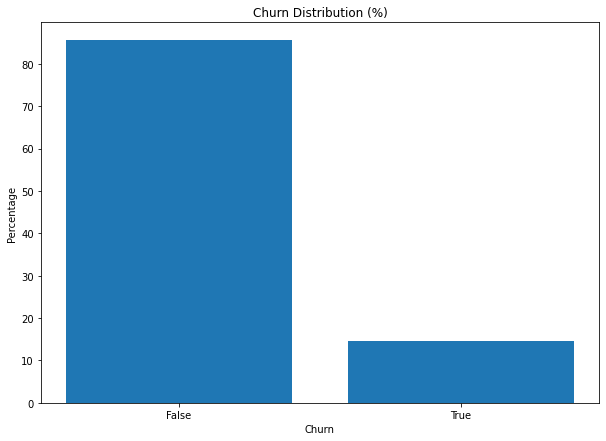

In [19]:
# Distribution of target variable churn

# Count of target variable
print(data["churn"].value_counts())

# Percentage of target variable
print(data["churn"].value_counts(normalize = True) * 100)

percentages = data["churn"].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 7))
plt.bar(percentages.index.astype(str), percentages.values)
plt.title("Churn Distribution (%)")
plt.xlabel("Churn")
plt.ylabel("Percentage")
plt.show()



2,850 customers did not churn, representing 85.5% of the dataset, while 483 customers churned, accounting for 14.5%. This indicates that the dataset is imbalanced, with significantly fewer churned customers compared to non-churned customers.

DISTRIBUTION OF VOICEMAIL PLAN

voice_mail_plan
no     2411
yes     922
Name: count, dtype: int64
voice_mail_plan
no     72.337234
yes    27.662766
Name: proportion, dtype: float64


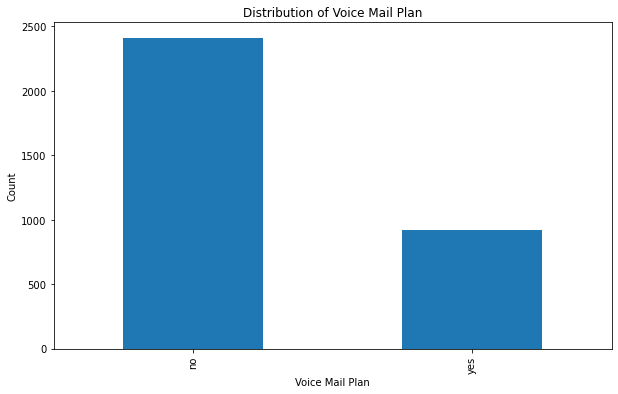

In [20]:
# Distribution of voice_mail_plan
print(data["voice_mail_plan"].value_counts())

# Percentage
print(data["voice_mail_plan"].value_counts(normalize = True) * 100)

# Visualize

data["voice_mail_plan"].value_counts().plot(kind="bar", figsize=(10, 6))
plt.title("Distribution of Voice Mail Plan")
plt.xlabel("Voice Mail Plan")
plt.ylabel("Count")
plt.show()



72% of customers do not have voicemail plan. 28% have a voice mail plan.

INTERNATIONAL PLAN DISTRIBUTION

international_plan
no     3010
yes     323
Name: count, dtype: int64
international_plan
no     90.309031
yes     9.690969
Name: proportion, dtype: float64


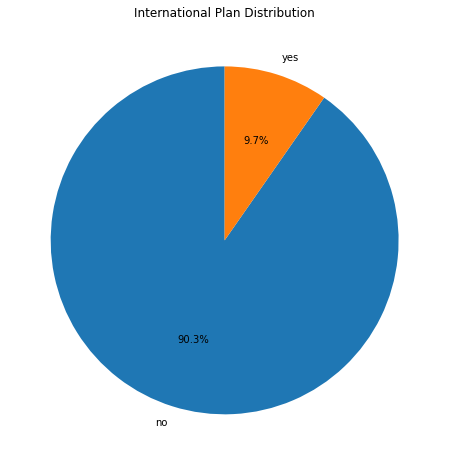

In [21]:
# Distribution of international_plan column
print(data["international_plan"].value_counts())

# Percentage
print(data["international_plan"].value_counts(normalize = True) * 100)


counts = data["international_plan"].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("International Plan Distribution")
plt.show()

3010 customers are not subscribed to an international plan while 323 have the international plan.

DISTRIBUTION OF AREA CODE

area_code
415    1655
510     840
408     838
Name: count, dtype: int64
area_code
415    49.654965
510    25.202520
408    25.142514
Name: proportion, dtype: float64


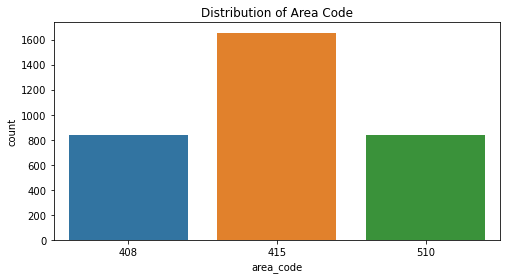

In [22]:
# Distribution of area_code column

print(data["area_code"].value_counts())

# Percentage
print(data["area_code"].value_counts(normalize = True) * 100)

# Visualize
plt.figure(figsize = (8, 4))
sns.countplot(x = "area_code", data = data)
plt.title("Distribution of Area Code")
plt.show()



Nearly half of the customers are located in the 415 area code, while the rest are fairly evenly distributed between the 510 and 408 area codes.

DISTRIBUTION OF STATES

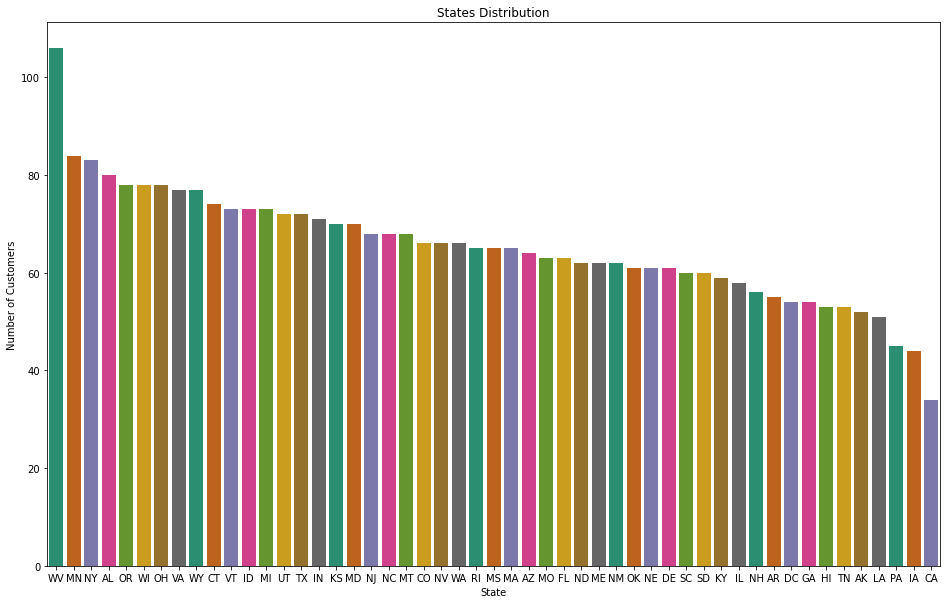

In [23]:
# Distribution of state column

# Get states by count
states = data['state'].value_counts() 

# Visualize
# Distribution of state column

# Get states by count
states = data['state'].value_counts() 

# Visualize
plt.figure(figsize = (16, 10))
sns.barplot(x = states.index, y = states.values, palette = 'Dark2', order = states.index)

plt.title("States Distribution")
plt.xlabel("State")
plt.ylabel("Number of Customers")
plt.show()



WV has the highest customer count at 106, representing the largest share in the group. MN, NY, AL, and OR follow closely, each recording between 78 and 84 customers

BIVARIATE ANALYSIS

Bivariate analysis explores the relationship between two variables to understand how one may influence or be associated with the other. In this context, we will focus on how various factors relate to customer churn

CHURN AGAINST ACCOUNT LENGTH

CHURN VS CUSTOMER SERVICE CALL

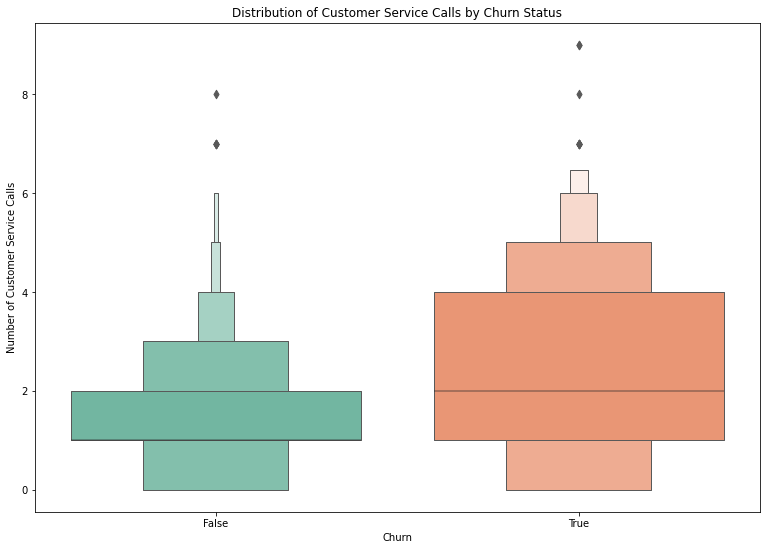

In [24]:
# Churn vs Customer service calls 

plt.figure(figsize=(13,9))
sns.boxenplot(
    data=data,
    x='churn',
    y='customer_service_calls',
    palette='Set2'
)
plt.title('Distribution of Customer Service Calls by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Number of Customer Service Calls')
plt.show()



From the plot, we can see that customers who churn tend to make more customer service calls, with a higher median and wider range, while non-churning customers generally make fewer calls

VOICEMAIL PLAN AND CHURN

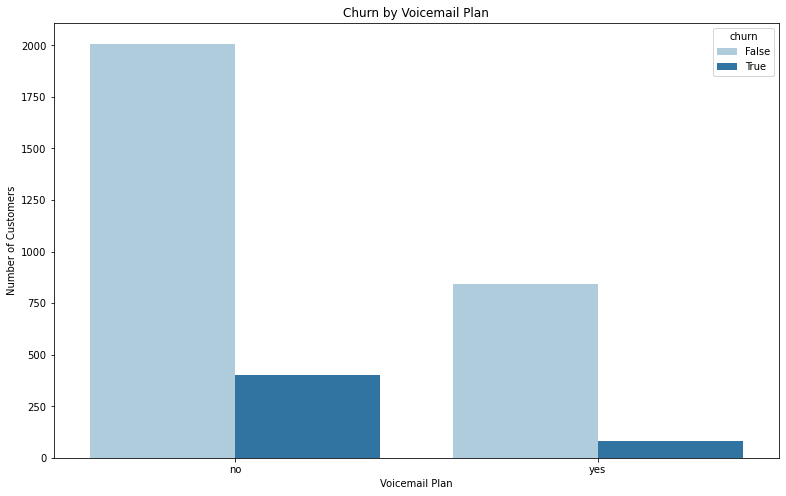

In [25]:
plt.figure(figsize = (13, 8))
sns.countplot(x = 'voice_mail_plan', hue = data['churn'].astype(str), data = data, palette = 'Paired')
plt.title("Churn by Voicemail Plan")
plt.xlabel("Voicemail Plan")
plt.ylabel("Number of Customers")
plt.show();

Customers who have subscribed to voicemail plans are less likely to churn.

 Plot to show international plan and churn

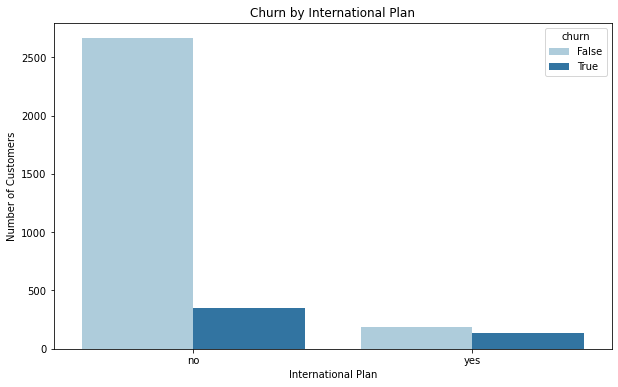

In [26]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'international_plan', hue = data['churn'].astype(str), data = data, palette = 'Paired')
plt.title("Churn by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Number of Customers")
plt.show()

While most customers opt out of international plans, those who do subscribe are less likely to churn.

Box plots to show charges vs churn

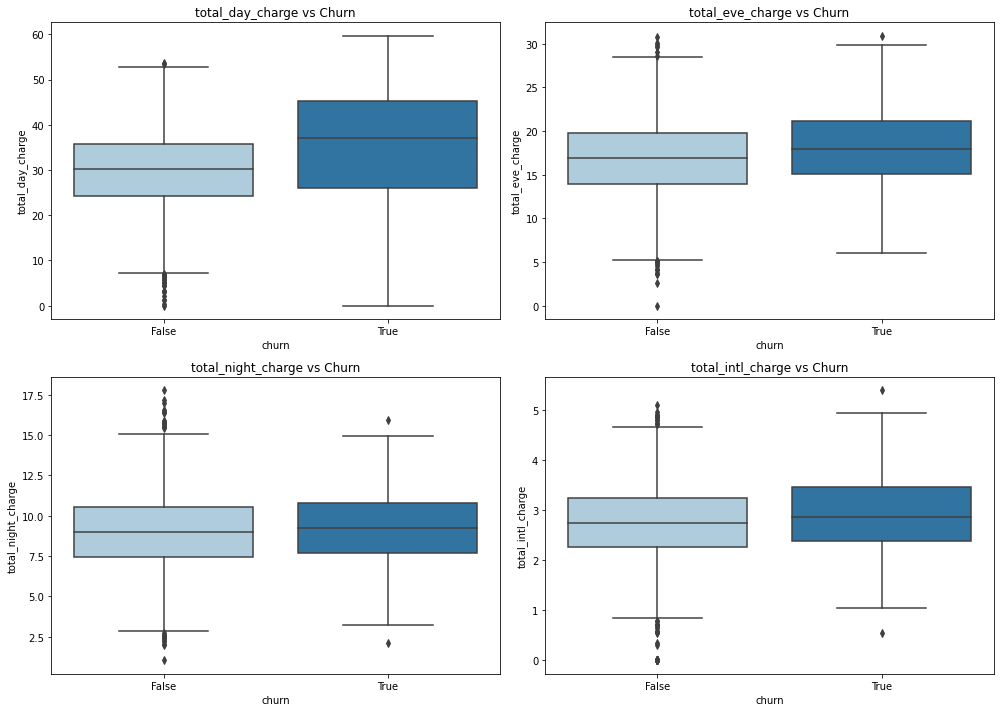

In [27]:

charge_features = ["total_day_charge", "total_eve_charge", "total_night_charge", "total_intl_charge"]

plt.figure(figsize = (14,10))
for i, col in enumerate(charge_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x = "churn", y = col, data = data, palette = "Paired")
    plt.title(f"{col} vs Churn")
plt.tight_layout()
plt.show()

The total day charge shows that most customers that have high spending churn.

MULTIVARIATE ANALYSIS

This entails a multivariate analysis that explores the relationships among several variables at the same time.

CORRELATION HEATMAP

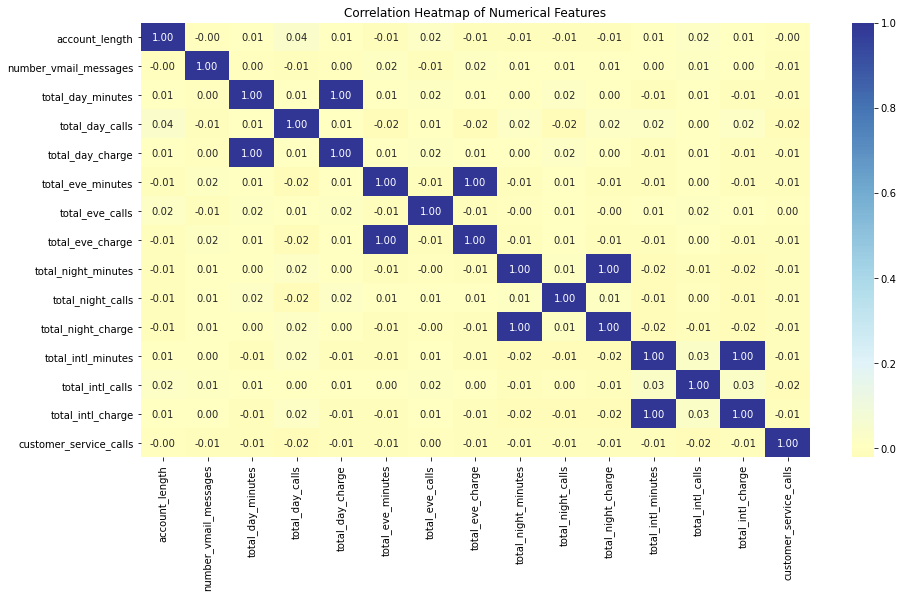

In [28]:
numerical_data = data.select_dtypes(include = ["number"])  
plt.figure(figsize = (15, 8))
sns.heatmap(numerical_data.corr(), annot = True, cmap = "RdYlBu", center = 0, fmt = ".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The correlation heatmap shows that most numerical features have very low correlations, indicating minimal multicollinearity. Strong correlations appear only between call minutes and their corresponding charges (day, evening, night, and international), which is expected since charges are directly derived from minutes. Other features, such as call counts and customer service calls, show weak correlations with the rest, suggesting they provide largely independent information.

DEALING WITH MULTICOLLINEARITY

In [29]:

import numpy as np

# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_data.corr().abs()

# Create mask and get upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)

# Find columns with high correlation
to_drop = tri_df.columns[tri_df.max() > 0.90].tolist()

# Drop highly correlated features from original dataframe
data = data.drop(to_drop, axis=1)

print("The reduced dataframe has {} columns.".format(data.shape[1]))
print("Dropped columns:", to_drop)


The reduced dataframe has 16 columns.
Dropped columns: ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']


In [30]:
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'customer_service_calls', 'churn'],
      dtype='object')

Visualize outliers for numerical features

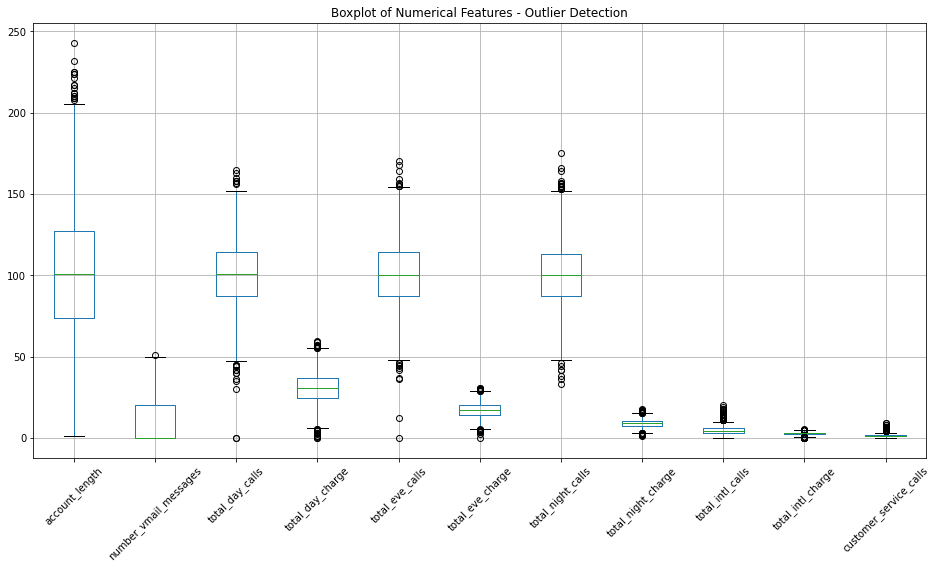

In [31]:
numerical_features = data.select_dtypes(include = ["int64", "float64"]).columns
plt.figure(figsize = (16, 8))
data[numerical_features].boxplot()
plt.title("Boxplot of Numerical Features - Outlier Detection")
plt.xticks(rotation=45)
plt.show()

Outliers were kept because they represent authentic customer behaviors, which could serve as important indicators of churn.

Data splitting
W begin by splitting data to separate Features (X) and Target (y).

In [32]:
# Separate the target from the features
X = data.drop ('churn', axis = 1) 
y = data['churn'] 



TRAIN-TEST SPLIT

We proceed by splitting the data into training and testing sets. The model will be trained on X_train and y_train and evaluated on the unseen X_test and y_test to assess its ability to generalize. Stratification is applied to maintain the same class distribution of the target variable in both sets.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

ONE-HOT ENCODING

One-hot encoding is a method to convert categorical data into a numeric format that machine learning models can use.

In this section, we will perform one-hot encoding on the following columns: `state`, `area_code`, `international_plan`, and `voice_mail_plan`.

In [34]:

# Categorical columns
categorical_cols = ['state', 'area_code', 'international_plan', 'voice_mail_plan']

# Initialize the OneHotEncoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Fit the encoder on the training data
ohe_encoder.fit(X_train[categorical_cols])

# Transform the training data
X_train_ohe = ohe_encoder.transform(X_train[categorical_cols])

# Convert the output to a DataFrame using the new method
feature_names = ohe_encoder.get_feature_names_out(categorical_cols)
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=feature_names, index=X_train.index)




In [35]:
# Transform the Test data 
X_test_ohe = ohe_encoder.transform(X_test[categorical_cols])
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns = feature_names, index = X_test.index) 

print(f"Shape of encoded training features: {X_train_ohe_df.shape}")
print(f"Shape of encoded test features: {X_test_ohe_df.shape}")

Shape of encoded training features: (2666, 58)
Shape of encoded test features: (667, 58)


SCALING NUMERICAL FEATURES

Features with varying scales can skew the performance of some models. To address this, we standardize our numerical features so they have a mean of 0 and a standard deviation of 1. The StandardScaler is fitted on the training data and then applied to both the training and test sets, ensuring no information from the test set leaks into the training process.

In [36]:
# Scale Numerical Features
numerical_cols = ['account_length', 'number_vmail_messages', 'total_day_calls', 
                  'total_day_charge', 'total_eve_calls', 'total_eve_charge', 
                  'total_night_calls', 'total_night_charge', 'total_intl_calls', 
                  'total_intl_charge', 'customer_service_calls']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the Training data's numerical columns
scaler.fit(X_train[numerical_cols])

# Transform the Training data
X_train_scaled = scaler.transform(X_train[numerical_cols])
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns = numerical_cols, index = X_train.index)

# Transform the Test data 
X_test_scaled = scaler.transform(X_test[numerical_cols])
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns = numerical_cols, index = X_test.index)

print(f"Shape of scaled training numerical features: {X_train_scaled_df.shape}")
print(f"Shape of scaled test numerical features: {X_test_scaled_df.shape}")



Shape of scaled training numerical features: (2666, 11)
Shape of scaled test numerical features: (667, 11)


In [37]:
# Save the modified DataFrame to a new csv file
data.to_csv("onehotencoded.csv", index = False)

JOINING PROCESSED FEATURES

After processing the categorical and numerical features separately, we combine them back into final training and test datasets by dropping the original columns and joining the new preprocessed DataFrames.

In [38]:
# Drop the original categorical and numerical columns from the original X_train
X_train_full = X_train.drop(columns=categorical_cols + numerical_cols)

# Join the new processed DataFrames
X_train_full = X_train_full.join([X_train_scaled_df, X_train_ohe_df])

# Drop the original categorical and numerical columns from the original X_test
X_test_full = X_test.drop(columns = categorical_cols + numerical_cols)
X_test_full = X_test_full.join([X_test_scaled_df, X_test_ohe_df])

print(f"Final training shape: {X_train_full.shape}")
print(f"Final test shape: {X_test_full.shape}")

Final training shape: (2666, 69)
Final test shape: (667, 69)


DEALING WITH CLASS IMBALANCE

SMOTE (Synthetic Minority Over-sampling Technique) is a popular method used to address the class imbalance problem in datasets. Our target variable `churn`, is imbalanced. We use SMOTE to synthetically generate examples for the minority class (customers who churned) only on the training data. 

In [39]:
import pandas as pd
from imblearn.over_sampling import SMOTE

print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

smote = SMOTE(random_state=42)

X_train_final, y_train_final = smote.fit_resample(
    X_train_full, y_train
)

print("\nAfter SMOTE:")
print(pd.Series(y_train_final).value_counts())
print("New shape:", X_train_final.shape)


Before SMOTE:
churn
False    2280
True      386
Name: count, dtype: int64

After SMOTE:
churn
False    2280
True     2280
Name: count, dtype: int64
New shape: (4560, 69)


MODELLING

Apply machine learning algorithms to predict customer churn. Since the target variable, churn, has two possible outcomes (False for non-churn and True for churn), the problem is framed as a binary classification task.

Train and evaluate multiple classification models, beginning with Logistic Regression and subsequently exploring additional models such as Decision Trees, Random Forests to compare their effectiveness in predicting customer churn.

Model performance is assessed using several key evaluation metrics, including Accuracy, Precision, Recall, F1-Score, and Confusion Matrices. The primary business objective is to develop a model that can reliably identify customers who are at a high risk of churning

LOGISTIC REGRESSION

This is an interpretable machine learning algorithm that is commonly used for binary classification tasks. This will be our baseline model to establish a performance benchmark.

In [40]:
# Initialize the Logistic Regression model.
logistic_model = LogisticRegression(random_state = 42, max_iter = 1000)

# Fit the model on the preprocessed training data
logistic_model.fit(X_train_final, y_train_final)

LogisticRegression(max_iter=1000, random_state=42)

In [41]:
# Make predictions on the preprocessed test set
y_pred = logistic_model.predict(X_test_full)

EVALUATING THE PERFORMANCE OF THE BASELINE MODEL

In [42]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.76      0.84       570
        True       0.33      0.69      0.45        97

    accuracy                           0.75       667
   macro avg       0.63      0.73      0.64       667
weighted avg       0.85      0.75      0.78       667



The model achieves an overall accuracy of 75%, indicating reasonable performance on the test data. It performs well in identifying non-churn customers, with high precision (0.94) and a solid F1-score (0.84). However, performance on churn prediction is weaker: while the recall for churn is relatively high (0.69), meaning the model successfully identifies many actual churners, the low precision (0.33) shows that a significant number of customers predicted to churn do not actually do so. Overall, the results suggest the model is effective at capturing potential churners but may generate a high number of false positives, which is an important trade-off to consider from a business perspective

CONFUSION MATRIX

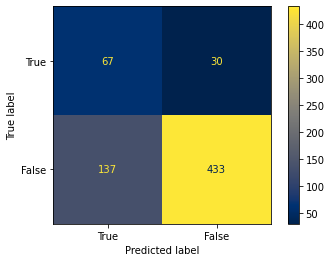

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define label order: True first, then False
labels = [True, False]

# Compute confusion matrix with custom label order
log_cm = confusion_matrix(y_test, y_pred, labels=labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(
    confusion_matrix=log_cm,
    display_labels=labels
)

disp.plot(cmap=plt.cm.cividis)
plt.show()


🔹 Summary Insights:

TRUE NEGATIVE(Bottom Right):The model is good at identifying non-churners (TN = 433).

FALSE POSTIIVE(Bottom Left):There are still 137 false alarms, meaning some non-churners are flagged incorrectly.

FALSE NEGATIVE(Top Right):The model missed 30 actual churners (FN), which is critical for churn prevention.

TRUE POSITIVE(True Positive):The 67 correctly identified churners (TP) represent the actionable segment for retention campaigns

OTHER MODELS:

RANDOM FOREST

In [46]:
# Initialize the Random Forest Model
rf_model = RandomForestClassifier(random_state = 42)

# Fit the model
rf_model.fit(X_train_final, y_train_final)

RandomForestClassifier(random_state=42)

In [47]:
# Make predictions
y_pred_rf = rf_model.predict(X_test_full)

RANDOM FOREST MODEL EVALUATION

In [48]:
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Classification Report:
               precision    recall  f1-score   support

       False       0.94      0.96      0.95       570
        True       0.76      0.65      0.70        97

    accuracy                           0.92       667
   macro avg       0.85      0.81      0.83       667
weighted avg       0.92      0.92      0.92       667



The model performs well overall, achieving 92% accuracy. It predicts the majority class (False) very accurately, with high precision, recall, and F1-score, but struggles more with the minority class (True), showing lower recall and F1-score. This indicates the model tends to favor the majority class and misses some True cases. While overall performance is strong, attention may be needed to improve detection of the minority class depending on the application

The confusion matrix will provide a clear visual breakdown of the model's predictions versus the actual outcomes, giving us insight into the types of errors it is making.

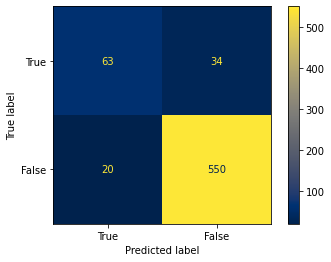

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)

# Use 'labels' parameter to reorder and display TP at top-left
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, 
                              display_labels=rf_model.classes_)
disp.plot(cmap=plt.cm.cividis, xticks_rotation='horizontal')

# Reverse the axes so TP is at top-left
plt.gca().invert_yaxis()   # flip y-axis
plt.gca().invert_xaxis()   # flip x-axis if needed
plt.show()


Top Left (63) True Positives - Customers who churned and model correctly predicted churn.

Bottom right (550) True Negatives - Customers who did not churn and model predicted not churn.

Bottom left(20) False Positives - Customers who did not churn but model predicted churn.

Top Right (34) False Negatives - Customers who actually churned but model predicted not churn.





DECISION TREES

In [53]:
# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model
dt_model.fit(X_train_final, y_train_final)

DecisionTreeClassifier(random_state=42)

In [54]:
# Make predictions
y_pred_dt = dt_model.predict(X_test_full)

DECISION TREE MODEL EVALUATION

In [55]:
print("\n Classification Report:\n", classification_report(y_test, y_pred_dt))


 Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.89      0.91       570
        True       0.50      0.62      0.55        97

    accuracy                           0.85       667
   macro avg       0.71      0.76      0.73       667
weighted avg       0.87      0.85      0.86       667



The model achieves an overall accuracy of 85%, performing strongly on the negative class (False) with high precision (0.93) and recall (0.89), but weaker on the positive class (True) with lower precision (0.50) and recall (0.62). This indicates it reliably identifies negatives but struggles to detect positives, reflecting the impact of class imbalance

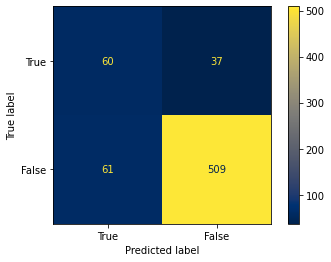

In [57]:


# Define class order with positive class first
labels = [True, False]  # assuming 'True' is the positive class

# Compute confusion matrix with new label order
dt_cm = confusion_matrix(y_test, y_pred_dt, labels=labels)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=dt_cm, display_labels=labels)
disp.plot(cmap=plt.cm.cividis)
plt.show()


TRUE POSITIVE 60,(Top Left):Customers who churned and model correctly predicted churn.

TRUE NEGATIVE 509, (Bottom Right):Customers who did not churn and model predicted not churn.

FALSE NEGATIVES 37,Top Right: Customers who actually churned but model predicted not churn.

FALSE POSITIVES 61 ,Bottom Left: Customers who did not churn but model predicted churn.

EVALUATION

We evaluate the performance of each model relative to the others to identify which most effectively detects customers at high risk of churning, enabling the implementation of proactive and efficient retention strategies.

In [58]:
# Evaluate the models based on key metrics
models = {
    "Logistic Regression": logistic_model,
    "Random Forest": rf_model,
    "Decision Tree": dt_model,
}

# Evaluate models
results = []
for name, model in models.items():
    y_pred = model.predict(X_test_full)  
    results.append([name,
        round(accuracy_score(y_test, y_pred) * 100, 2),
        round(precision_score(y_test, y_pred) * 100, 2),
        round(recall_score(y_test, y_pred) * 100, 2),
        round(f1_score(y_test, y_pred) * 100, 2)])

# Put into DataFrame
results_df = pd.DataFrame(results, columns = ["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print(results_df)

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression     74.96      32.84   69.07     44.52
1        Random Forest     91.90      75.90   64.95     70.00
2        Decision Tree     85.31      49.59   61.86     55.05


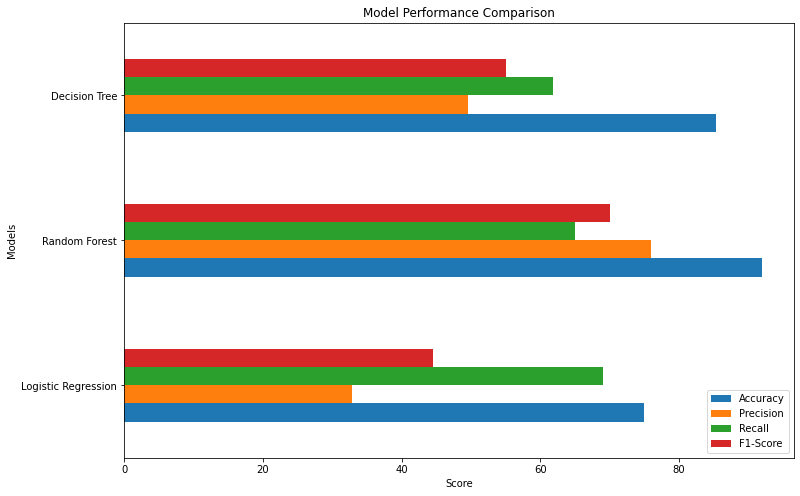

In [64]:
# Visualize the model performance
results_plot.plot(kind='barh', figsize=(12, 8))
plt.title("Model Performance Comparison")
plt.xlabel("Score")
plt.ylabel("Models")
plt.legend(loc="lower right")
plt.show()





Though our focus was mainly classification model,Random Forest achieved the best performance with 91.9% accuracy and an F1-score of 70%. This suggests it is the most effective model for predicting churn in our dataset. Decision Tree performed moderately, while Logistic Regression struggled with low precision

COMPARING MODELS-ROC AND AUC METRICS

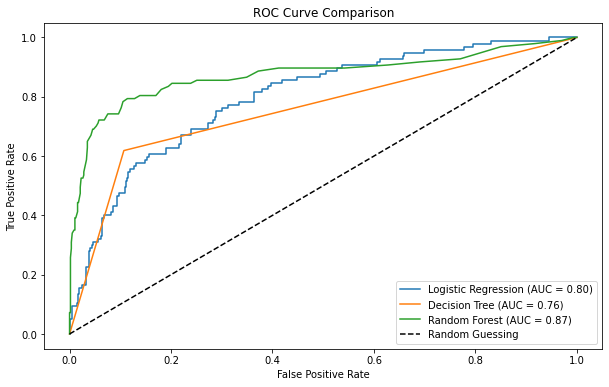

In [66]:
# Get predicted probabilities for ROC curve
y_prob_lr = logistic_model.predict_proba(X_test_full)[:,1]
y_prob_tree = dt_model.predict_proba(X_test_full)[:,1]
y_prob_forest = rf_model.predict_proba(X_test_full)[:,1]


# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_prob_forest)

# Plot ROC curves
plt.figure(figsize = (10,6))
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {roc_auc_score(y_test, y_prob_tree):.2f})")
plt.plot(fpr_forest, tpr_forest, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_forest):.2f})")



# Add line for random guessing
plt.plot([0,1], [0,1], 'k--', label="Random Guessing")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()